# Importer les bibliothèques nécessaires

In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import missingno as msno
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from scipy.stats import skew, kurtosis, jarque_bera
from sklearn.model_selection import train_test_split
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
plt.style.use('ggplot') # Appliquer le style 'ggplot' à Matplotlib

# PARTIE I : CHARGEMENT ET PREPARATION DES DONNEES

## 1. Chargement et aperçu des donnees

### 1.1. Charger les donnees

In [134]:
df = pd.read_csv("D:/INSSEDS/datasets/delai_livraison.csv")

### 1.2. Visualiser les premieres lignes du DataFrame pour inspection

In [135]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.930000,Windy,Low,Afternoon,Scooter,12,1.000000,43
1,738,16.420000,Clear,Medium,Evening,Bike,20,2.000000,84
2,741,9.520000,Foggy,Low,Night,Scooter,28,1.000000,59
3,661,7.440000,Rainy,Medium,Afternoon,Scooter,5,1.000000,37
4,412,19.030000,Clear,Low,Morning,Bike,16,5.000000,68


### 1.3. Infos

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [137]:
# Changer le type de la colonne 'Order_ID' en chaîne de caractères
df['Order_ID'] = df['Order_ID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   object 
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 70.4+ KB


## 2. Traitement des valeurs manquantes

### 2.1. Visualisation des valeurs manquantes

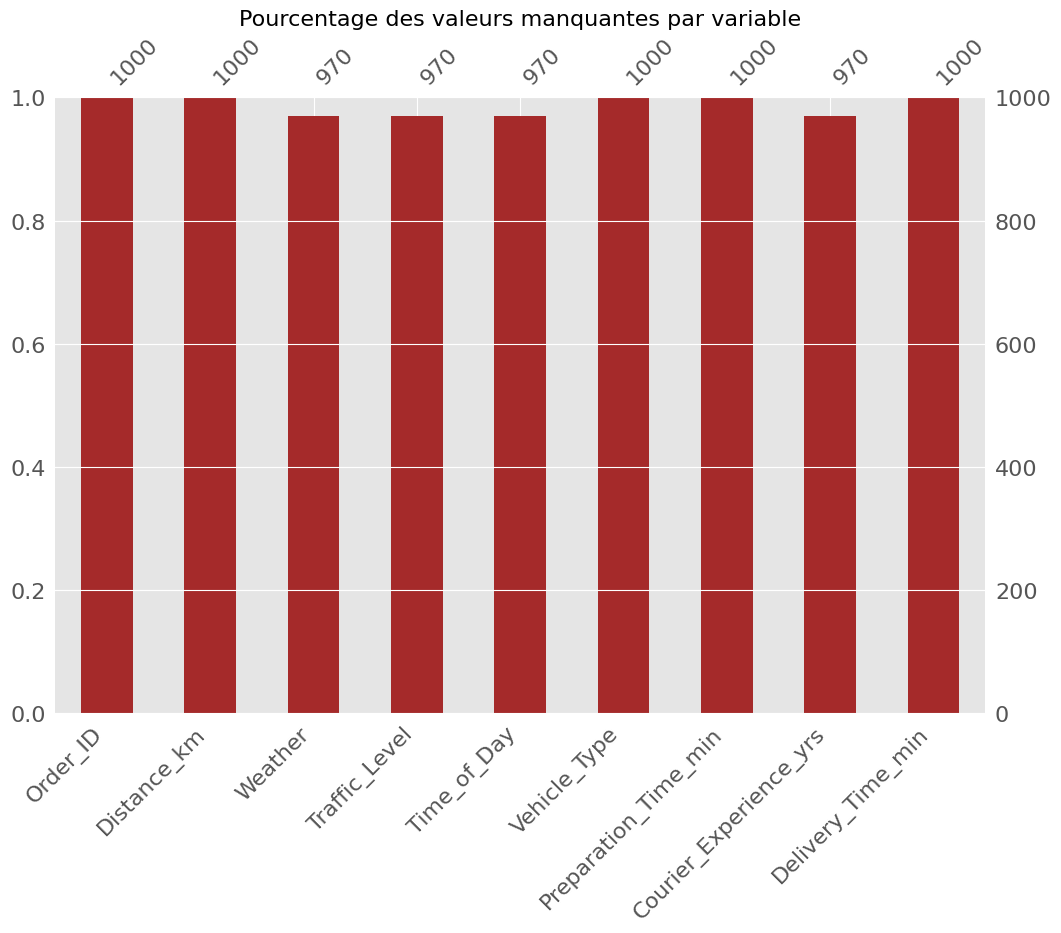

In [138]:
# Visualiser le pourcentage de valeurs manquantes pour chaque colonne
msno.bar(df, color='brown', figsize=(12, 8))

# Ajouter un titre
plt.title('Pourcentage des valeurs manquantes par variable', fontsize=16)

# Afficher le graphique
plt.show()

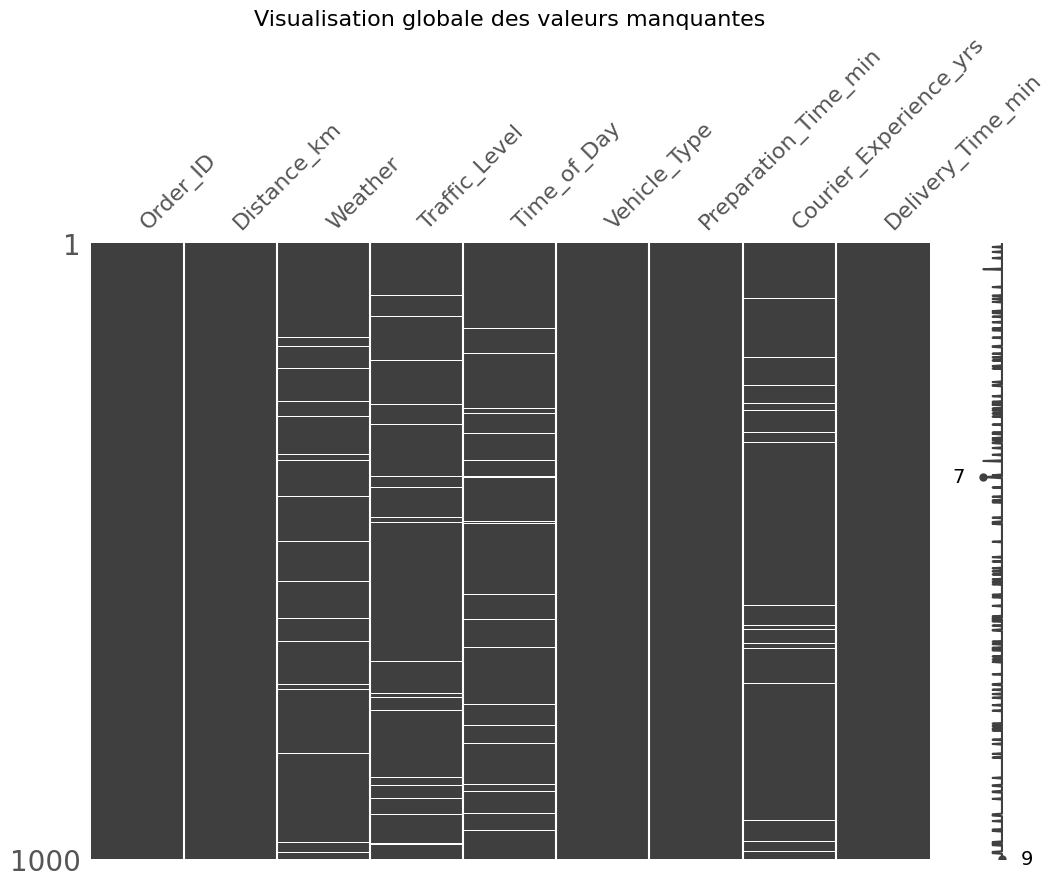

In [139]:
# Visualiser les valeurs manquantes globalement
msno.matrix(df, figsize=(12, 8))

# Ajouter un titre pour la visualisation globale
plt.title('Visualisation globale des valeurs manquantes', fontsize=16)

# Afficher le graphique
plt.show()

### 2.2. Imputation des variables manquantes

In [140]:
# Imputation des colonnes numériques avec la valeur médiane
numeric_columns = ["Courier_Experience_yrs"]
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].median())

# Imputation des colonnes catégoriques avec la valeur modale
categorical_columns = ["Weather", "Traffic_Level", "Time_of_Day"]
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Vérification des valeurs manquantes restantes
df.isnull().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

### 2.3. Visualisation des valeurs manquantes traitées

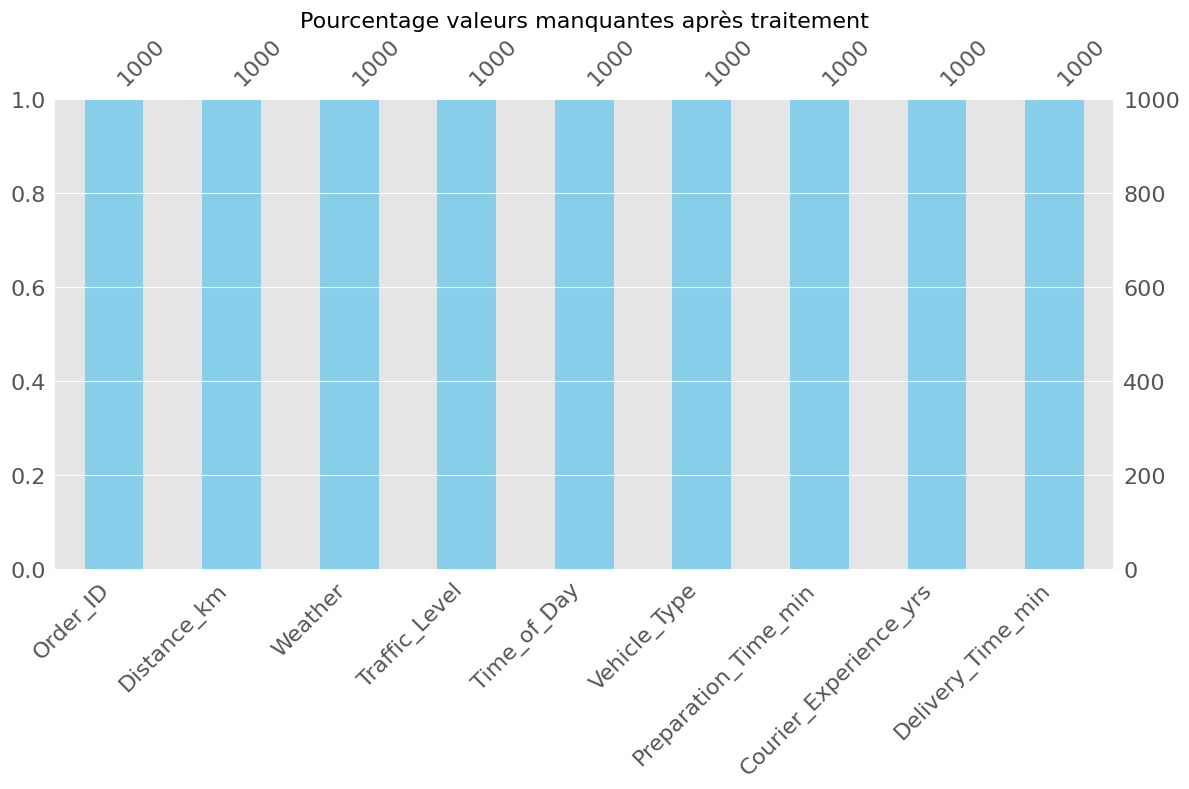

In [141]:
# Visualiser des valeurs manquantes traitées
msno.bar(df, color='skyblue', figsize=(12, 8))

# Ajouter un titre
plt.title('Pourcentage valeurs manquantes après traitement', fontsize=16)

# Afficher le graphique
plt.tight_layout()
plt.show()


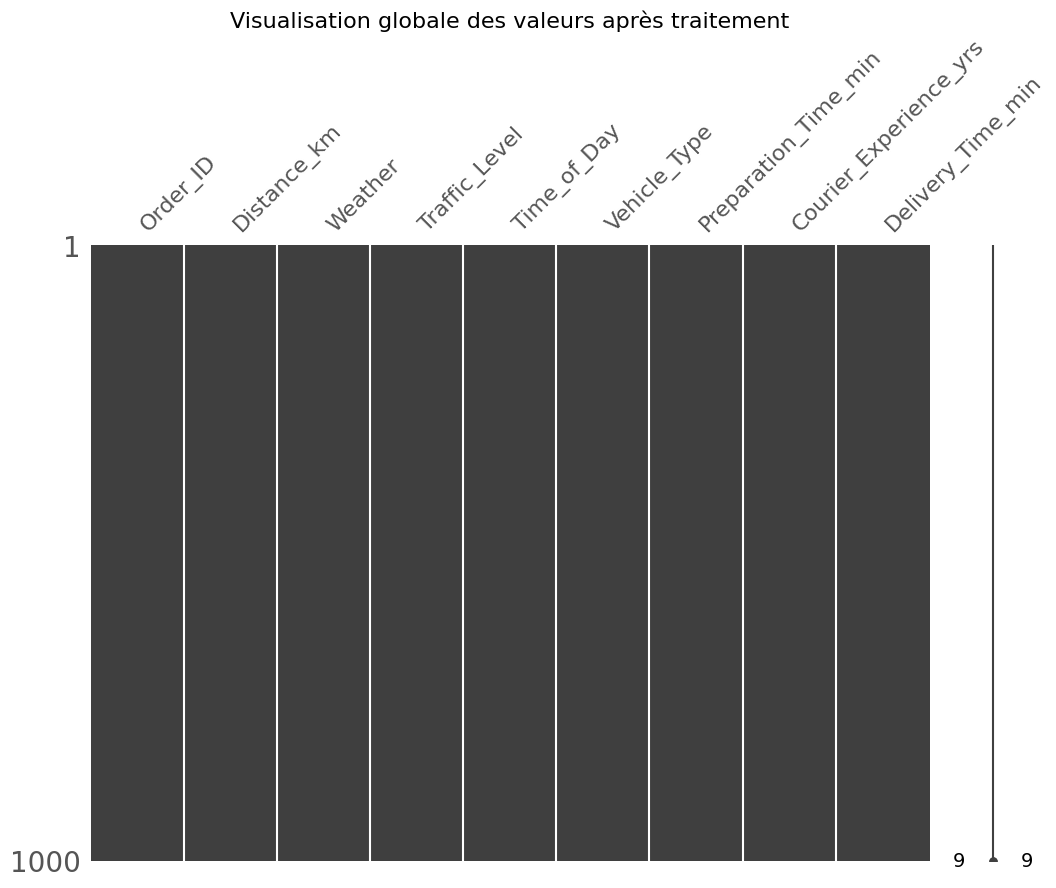

In [142]:
# Visualiser les valeurs manquantes globalement
msno.matrix(df, figsize=(12, 8))

# Ajouter un titre pour la visualisation globale
plt.title('Visualisation globale des valeurs après traitement', fontsize=16)

# Afficher le graphique
plt.show()

## 3. Traitement des valeurs  abberantes et/ ou extremes

### 3.1. Selectionner uniquement les colonnes numériques

In [143]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.930000,12,1.000000,43
1,16.420000,20,2.000000,84
2,9.520000,28,1.000000,59
3,7.440000,5,1.000000,37
4,19.030000,16,5.000000,68
...,...,...,...,...
995,8.500000,13,3.000000,54
996,16.280000,8,9.000000,71
997,15.620000,26,2.000000,81
998,14.170000,8,0.000000,55


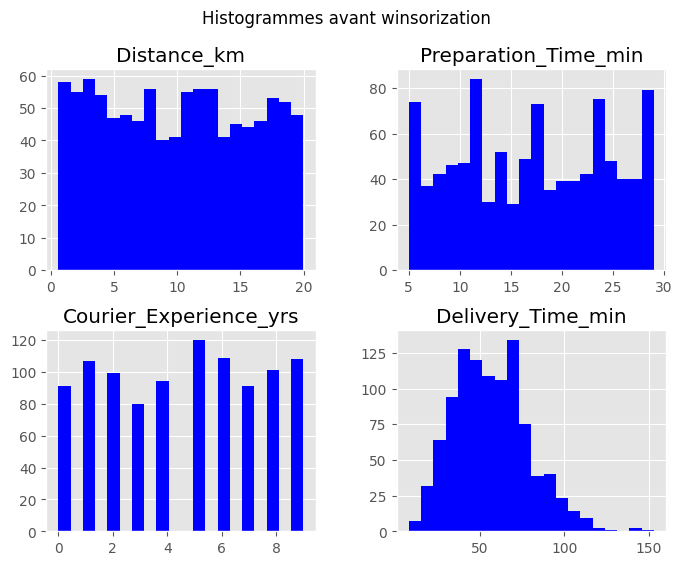

In [144]:
# Histogramme pour chaque colonne avant winzorisation
df_numeric.hist(bins=20, figsize=(8, 6), color = 'b')
plt.suptitle("Histogrammes avant winsorization")
plt.show()


In [145]:
# Afficher les statistiques descriptives avant winzorisation
df_numeric.describe()

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,10.059970,16.982000,4.592000,56.732000
std,5.696656,7.204553,2.871198,22.070915
min,0.590000,5.000000,0.000000,8.000000
25%,5.105000,11.000000,2.000000,41.000000
50%,10.190000,17.000000,5.000000,55.500000
75%,15.017500,23.000000,7.000000,71.000000
max,19.990000,29.000000,9.000000,153.000000


### 3.2. Boxplot pour chaque colonne numerique

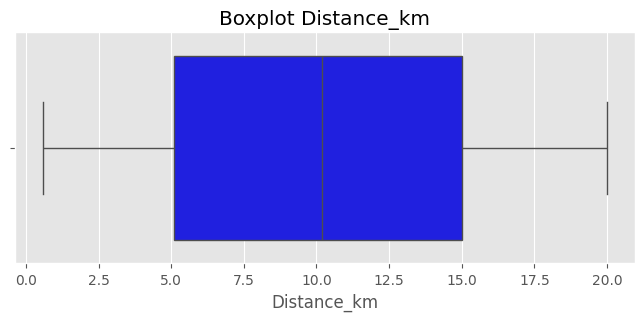

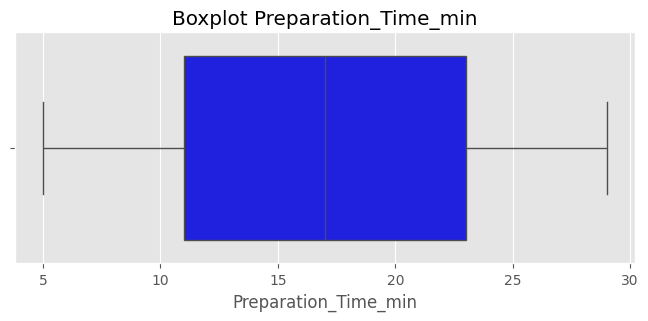

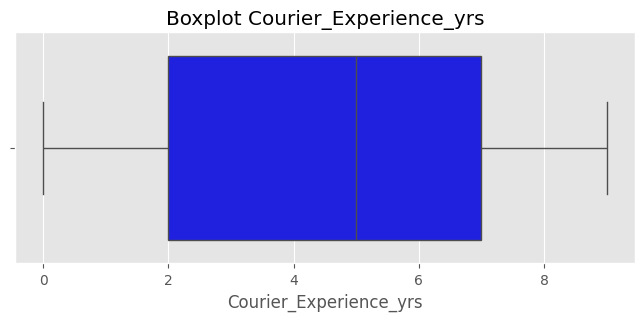

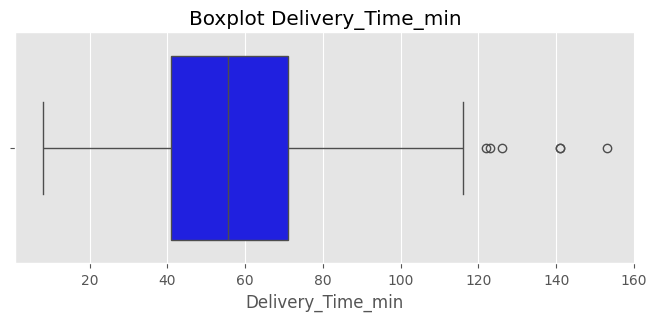

In [146]:
# Créer un boxplot pour chaque colonne numérique dans un graphique séparé
for column in df_numeric.columns:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df_numeric[column], color='b')
    plt.title(f'Boxplot {column}')
    plt.xlabel(column)
    plt.show()


### 3.3. Traitement des valeurs abberantes et/ ou extremes

In [147]:
# Calculer les quartiles et l'IQR pour chaque colonne
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes de Winsorization
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Appliquer la Winsorization sur chaque colonne numérique
df_winzorized = df_numeric.apply(
     lambda x: x.clip(lower=lower_bound[x.name], 
                      upper=upper_bound[x.name]), 
                      axis=0
                     )

# Remplacer les colonnes numériques dans le DataFrame d'origine
df_numeric.update(df_winzorized)
df.update(df_winzorized)


In [148]:
(df_numeric < lower_bound) | (df_numeric > upper_bound)


,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
995,False,False,False,False
996,False,False,False,False
997,False,False,False,False
998,False,False,False,False


In [149]:
# Vérifier les valeurs qui dépassent les bornes définies
outliers_lower = df_numeric[df_numeric < lower_bound]
outliers_upper = df_numeric[df_numeric > upper_bound]

# Vérifier si des valeurs aberrantes sont présentes
print("Valeurs inférieures à la borne inférieure :")
outliers_lower

Valeurs inférieures à la borne inférieure :


,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
995,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN


In [150]:
print("Valeurs supérieures à la borne supérieure :")
outliers_upper

Valeurs supérieures à la borne supérieure :


,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
995,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN


### 3.4. Boxplot pour chaque colonne numerique apres traitement

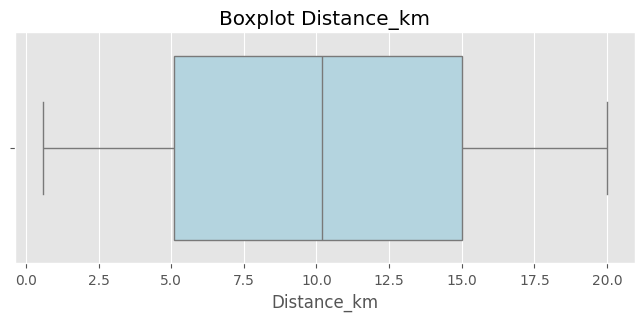

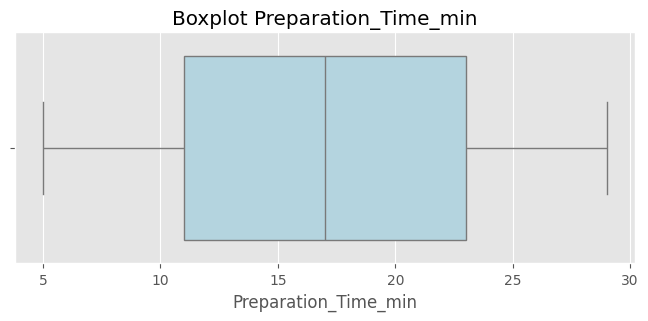

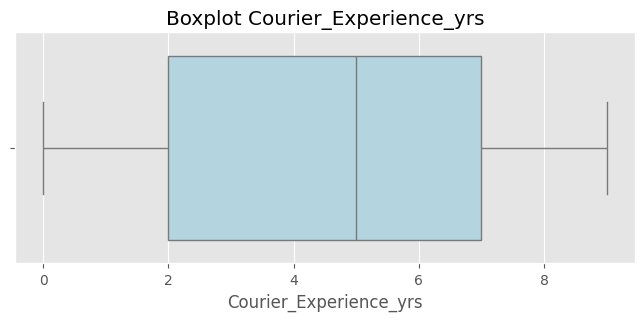

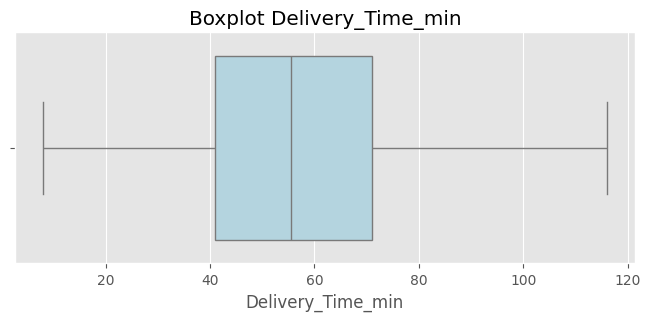

In [151]:
# Créer un boxplot pour chaque colonne numérique dans un graphique séparé
for column in df_numeric.columns:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df_numeric[column], color='lightblue')
    plt.title(f'Boxplot {column}')
    plt.xlabel(column)
    plt.show()

In [152]:
# Afficher les statistiques descriptives
df.describe()


,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,10.059970,16.982000,4.592000,56.622000
std,5.696656,7.204553,2.871198,21.708394
min,0.590000,5.000000,0.000000,8.000000
25%,5.105000,11.000000,2.000000,41.000000
50%,10.190000,17.000000,5.000000,55.500000
75%,15.017500,23.000000,7.000000,71.000000
max,19.990000,29.000000,9.000000,116.000000


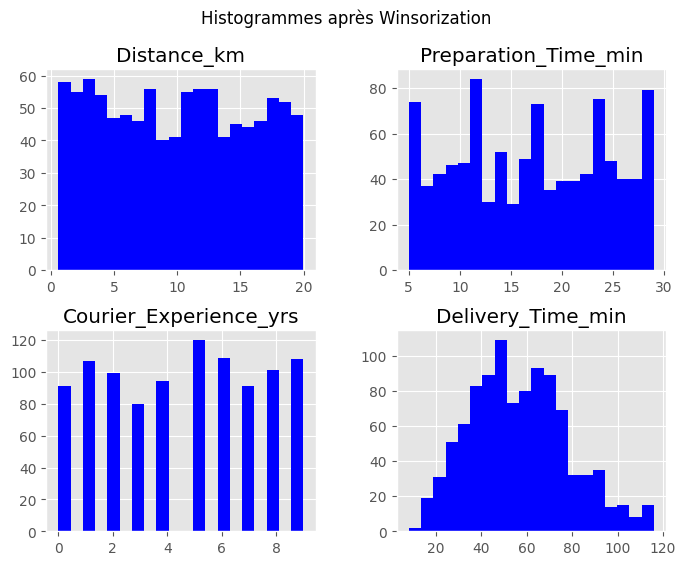

In [153]:
# Histogramme pour chaque colonne après Winsorization
df.hist(bins=20, figsize=(8, 6), color = 'b')
plt.suptitle("Histogrammes après Winsorization")
plt.show()

In [154]:
# Exportation du fichier traité

df.to_csv('delais.csv', index=False)

# PARTIE II : REG LINEAIRE

## 1. Explorer les relations entre les variables

### 1.1. Calcul et visualisation de la corrélation entre chaque variable et la variable cible

In [155]:
from sklearn.preprocessing import LabelEncoder

# Créer un encodeur pour chaque colonne catégorielle sauf 'Order_ID'
label_encoders = {}
df_encoded = df.drop(columns=['Order_ID']).copy()  # Supprimer 'Order_ID' et travailler sur une copie

# Sélectionner les colonnes catégorielles pour l'encodage
categorical_columns = df_encoded.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

df_encoded


,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.930000,4,1,0,2,12,1.000000,43
1,16.420000,0,2,1,0,20,2.000000,84
2,9.520000,1,1,3,2,28,1.000000,59
3,7.440000,2,2,0,2,5,1.000000,37
4,19.030000,0,1,2,0,16,5.000000,68
...,...,...,...,...,...,...,...,...
995,8.500000,0,0,1,1,13,3.000000,54
996,16.280000,2,1,2,2,8,9.000000,71
997,15.620000,3,0,1,2,26,2.000000,81
998,14.170000,0,1,0,0,8,0.000000,55


In [156]:
# Créer un encodeur pour chaque colonne catégorielle sauf 'Order_ID'
label_encoders = {}
df_encoded = df.drop(columns=['Order_ID']).copy()  # Supprimer 'Order_ID'

# Sélectionner les colonnes catégorielles pour l'encodage
categorical_columns = df_encoded.select_dtypes(include=['object']).columns

print("Modalités avant encodage :")
for col in categorical_columns:
    print(f"{col}: {df_encoded[col].unique()}")


Modalités avant encodage :
Weather: ['Windy' 'Clear' 'Foggy' 'Rainy' 'Snowy']
Traffic_Level: ['Low' 'Medium' 'High']
Time_of_Day: ['Afternoon' 'Evening' 'Night' 'Morning']
Vehicle_Type: ['Scooter' 'Bike' 'Car']


In [157]:
# Encoder les colonnes catégorielles
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Afficher les modalités après encodage
print("\nModalités après encodage :")
for col in categorical_columns:
    print(f"{col}: {dict(enumerate(label_encoders[col].classes_))}")


Modalités après encodage :
Weather: {0: 'Clear', 1: 'Foggy', 2: 'Rainy', 3: 'Snowy', 4: 'Windy'}
Traffic_Level: {0: 'High', 1: 'Low', 2: 'Medium'}
Time_of_Day: {0: 'Afternoon', 1: 'Evening', 2: 'Morning', 3: 'Night'}
Vehicle_Type: {0: 'Bike', 1: 'Car', 2: 'Scooter'}


In [158]:
# Calcul de la corrélation entre toutes les variables et 'Delivery_Time_min'
correlation_matrix = df_encoded.corr()
correlation_matrix


,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
Distance_km,1.000000,0.056460,-0.044290,0.000991,0.003319,-0.009037,-0.007534,0.787378
Weather,0.056460,1.000000,-0.041645,-0.005035,-0.058259,-0.021805,0.064830,0.136298
Traffic_Level,-0.044290,-0.041645,1.000000,0.032047,0.020989,0.000556,-0.037020,-0.105355
Time_of_Day,0.000991,-0.005035,0.032047,1.000000,-0.044284,-0.001159,-0.041823,-0.001271
Vehicle_Type,0.003319,-0.058259,0.020989,-0.044284,1.000000,0.020707,-0.001996,-0.008590
Preparation_Time_min,-0.009037,-0.021805,0.000556,-0.001159,0.020707,1.000000,-0.030842,0.307900
Courier_Experience_yrs,-0.007534,0.064830,-0.037020,-0.041823,-0.001996,-0.030842,1.000000,-0.088108
Delivery_Time_min,0.787378,0.136298,-0.105355,-0.001271,-0.008590,0.307900,-0.088108,1.000000


In [159]:
# Affichage de la corrélation de 'Delivery_Time_min' avec toutes les autres variables
correlation_with_delivery_time = correlation_matrix['Delivery_Time_min']
correlation_with_delivery_time

Distance_km               0.787378
Weather                   0.136298
Traffic_Level            -0.105355
Time_of_Day              -0.001271
Vehicle_Type             -0.008590
Preparation_Time_min      0.307900
Courier_Experience_yrs   -0.088108
Delivery_Time_min         1.000000
Name: Delivery_Time_min, dtype: float64

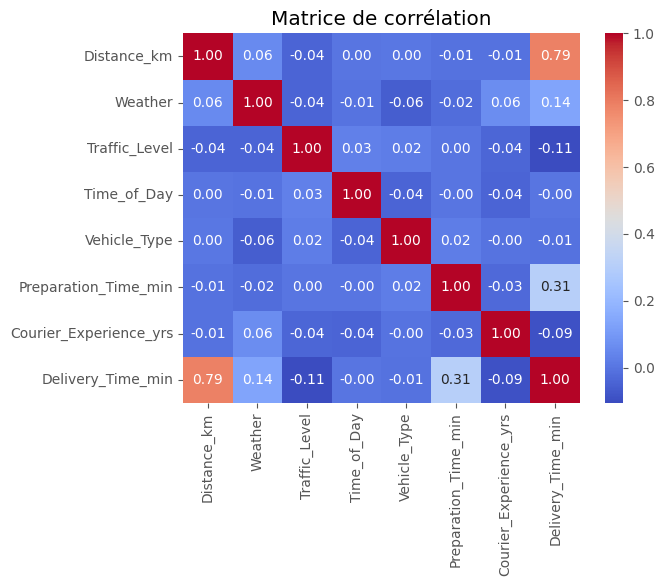

In [160]:
# Heatmap de la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Matrice de corrélation")
plt.show()


In [161]:
# Sélectionner les colonnes numériques
X_numeric = df_winzorized
# Définir y comme étant la colonne cible
y = df_winzorized['Delivery_Time_min']
# Inclure la cible dans le DataFrame utilisé pour la corrélation
X_numeric_with_target = X_numeric.copy()
X_numeric_with_target['Delivery_Time_min'] = y

In [162]:
# Calcul de la matrice de corrélation
correlation_matrix = X_numeric.corr()
correlation_matrix

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
Distance_km,1.000000,-0.009037,-0.007534,0.787378
Preparation_Time_min,-0.009037,1.000000,-0.030842,0.307900
Courier_Experience_yrs,-0.007534,-0.030842,1.000000,-0.088108
Delivery_Time_min,0.787378,0.307900,-0.088108,1.000000


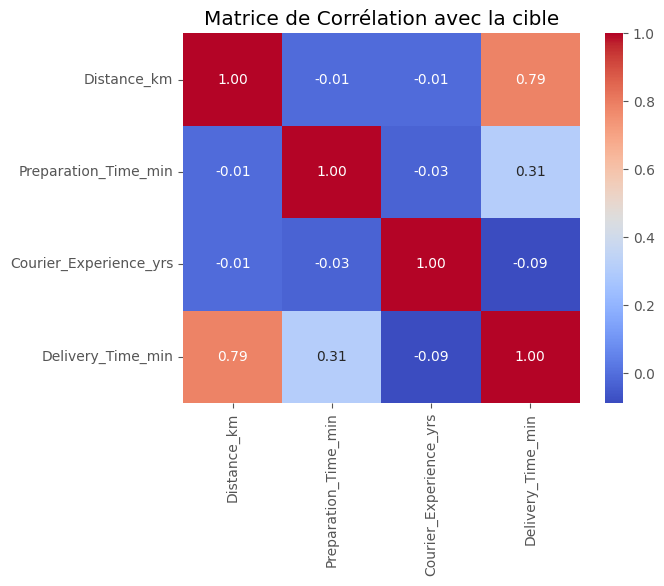

In [163]:
# Afficher la matrice de corrélation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation avec la cible')
plt.show()

### 1.2. Sélectionner les variables les plus explicatives

In [164]:
correlations = X_numeric.corrwith(y)
correlations

Distance_km               0.787378
Preparation_Time_min      0.307900
Courier_Experience_yrs   -0.088108
Delivery_Time_min         1.000000
dtype: float64

In [165]:
# Sélectionner les variables avec une corrélation absolue supérieure à un seuil
threshold_corr = 0.3  # Retenons cette valeur comme seuil de corrélation
selected_variables = correlations[correlations.abs() > threshold_corr].index.tolist()

# Exclure la variable cible 'Delivery_Time_min' de 'correlations'
selected_variables = [var for var in selected_variables if var != 'Delivery_Time_min']

print("Variables sélectionnées sans la cible :", selected_variables)

Variables sélectionnées sans la cible : ['Distance_km', 'Preparation_Time_min']


## 2. Construction du modèle de régression linéaire

### 2.1. Partitionnement des données en ensemble d'entraînement et de test

In [166]:
# Sélection des variables et préparation des données
X_selected = X_numeric[selected_variables]  # Variables sélectionnées
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 2.2. Le modèle de régression linéaire

In [167]:
# Créer et entraîner le modèle de régression linéaire
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [168]:
# Faire des prédictions sur l'ensemble de test
y_pred = linear_model.predict(X_test_scaled)

### 2.3 Calculer les métriques de performance

In [169]:
# Afficher les coefficients du modèle
print("\nCoefficients du modèle de régression linéaire :")
coefficients = pd.DataFrame(linear_model.coef_, index=X_selected.columns, columns=["Coefficients"])
coefficients


Coefficients du modèle de régression linéaire :


,Coefficients
Distance_km,17.209173
Preparation_Time_min,7.001535


In [170]:
# Faire des prédictions sur l'ensemble d'entraînement
y_train_pred = linear_model.predict(X_train_scaled)

# Calcul des métriques pour l'ensemble d'entraînement
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

# Calcul des métriques pour l'ensemble de test
r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)

# Construction du tableau de résultats
df_metrics = pd.DataFrame({
    'Metriques': ['R²', 'MSE', 'RMSE'],
    'Train': [r2_train, mse_train, rmse_train],
    'Test': [r2_test, mse_test, rmse_test]
})

# Afficher le tableau des métriques
df_metrics


,Metriques,Train,Test
0,R²,0.715340,0.734336
1,MSE,135.760156,118.064637
2,RMSE,11.651616,10.865755


In [171]:
# Calcul des résidus
residuals = y_train - y_train_pred

# Nombre d'observations et de caractéristiques
n = X_train_scaled.shape[0]  # Nombre d'observations
p = X_train_scaled.shape[1]  # Nombre de paramètres (caractéristiques)

# Calcul de la variance des erreurs
error_variance = np.var(residuals)

# Calcul des MSE
mse = mean_squared_error(y_train, y_train_pred)

# AIC et BIC
aic = n * np.log(mse) + 2 * (p + 1)  # +1 pour l'intercept
bic = n * np.log(mse) + np.log(n) * (p + 1)

# F-statistic (calcul basé sur la variance expliquée et résiduelle)
ss_total = np.sum((y_train - np.mean(y_train))**2)
ss_residual = np.sum(residuals**2)
f_statistic = (ss_total - ss_residual) / (p) / (ss_residual / (n - p - 1))

# Probabilité associée à la statistique F
prob_f_statistic = 1 - stats.f.cdf(f_statistic, p, n - p - 1)

# Log-Likelihood (approximé)
log_likelihood = -0.5 * n * np.log(2 * np.pi * error_variance) - 0.5 * np.sum((residuals**2) / error_variance)

# Degrés de liberté
df_residuals = n - p - 1  # Degrés de liberté des résidus
df_model = p  # Degrés de liberté du modèle


In [172]:
import pandas as pd

# Configuration pour éviter la notation scientifique
pd.set_option('display.float_format', '{:.6f}'.format)

# Données des résultats
data = {
    "Metriques": [
        "F-statistic", 
        "Prob (F-statistic)", 
        "Log-Likelihood", 
        "AIC", 
        "BIC", 
        "n", 
        "Df Residuals", 
        "Df_model"
    ],
    "Valeurs": [
        f_statistic, 
        prob_f_statistic, 
        log_likelihood, 
        aic, 
        bic, 
        n, 
        df_residuals, 
        df_model
    ]
}

# Créer le DataFrame
df_results = pd.DataFrame(data)

df_results


,Metriques,Valeurs
0,F-statistic,1001.415844
1,Prob (F-statistic),0.000000
2,Log-Likelihood,-3099.506735
3,AIC,3934.711817
4,BIC,3948.765653
5,n,800.000000
6,Df Residuals,797.000000
7,Df_model,2.000000


In [173]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.stattools import durbin_watson

# Entraînement du modèle
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Faire des prédictions
y_train_pred = linear_model.predict(X_train_scaled)
y_test_pred = linear_model.predict(X_test_scaled)

# Calcul des résidus
residuals = y_train - y_train_pred

# Durbin-Watson : teste l'autocorrélation des résidus
dw_statistic = durbin_watson(residuals)

# Jarque-Bera : teste la normalité des résidus
jb_statistic, jb_p_value = stats.jarque_bera(residuals)

# Skewness : mesure de l'asymétrie des résidus
skewness = stats.skew(residuals)

# Kurtosis : mesure de l'aplatissement des résidus
kurtosis = stats.kurtosis(residuals)

# Condition Number : mesure de la colinéarité dans les variables indépendantes
X_with_const = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]  # Ajouter une constante pour l'intercept
condition_number = np.linalg.cond(X_with_const)

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({
    'Metriques': ['Durbin-Watson', 'Jarque-Bera Statistic', 'Jarque-Bera p-value', 'Skewness', 'Kurtosis', 'Condition Number'],
    'Valeurs': [dw_statistic, jb_statistic, jb_p_value, skewness, kurtosis, condition_number]
})

# Affichage du tableau des résultats
results_df


,Metriques,Valeurs
0,Durbin-Watson,2.007057
1,Jarque-Bera Statistic,2140.803291
2,Jarque-Bera p-value,0.000000
3,Skewness,1.864054
4,Kurtosis,7.094033
5,Condition Number,1.016810


In [174]:
# Créer un DataFrame avec les valeurs réelles et prédites
comparison_df = pd.DataFrame({
    'Réel': y_test,
    'Prédiction': y_pred
})

comparison_df

,Réel,Prédiction
521,32,41.436166
737,68,65.678281
740,39,35.708194
660,44,43.266346
411,85,84.731093
...,...,...
408,78,79.257667
332,28,28.971670
208,60,56.445634
613,45,44.975235


##Prédiction 

In [175]:
import pandas as pd
import numpy as np

# Supposons que les noms de colonnes pour les caractéristiques sont 'distance' et 'preparation_time'
col_names = ['Distance_km', 'Preparation_Time_min']

# Nouvelle donnée : distance de 10 km et temps de préparation de 15 minutes
nouvelle_donnee = np.array([[10, 15]])

# Créer un DataFrame pour les nouvelles données avec les mêmes colonnes que celles utilisées pour entraîner le modèle
nouvelle_donnee_df = pd.DataFrame(nouvelle_donnee, columns=col_names)

# Mettre à l'échelle les nouvelles données en utilisant le scaler que vous avez utilisé pour entraîner le modèle
nouvelle_donnee_scaled = scaler.transform(nouvelle_donnee_df)

# Faire la prédiction avec le modèle linéaire
prediction = linear_model.predict(nouvelle_donnee_scaled)

# Afficher la prédiction
print("Temps de livraison prédit:", prediction[0])


Temps de livraison prédit: 54.60149830343386


## 3. Vérification des hypothèses du modèles

### Dispersion entre les valeurs réelles et les prédictions

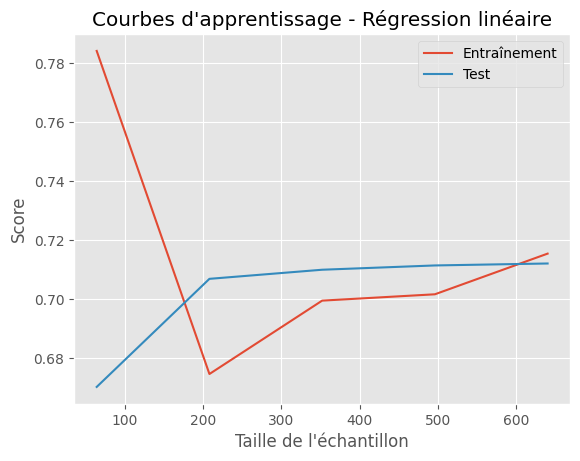

In [176]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Créer et entraîner le modèle de régression linéaire
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Calcul des courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(linear_model, X_train_scaled, y_train, cv=5)

# Calcul de la moyenne et de l'écart type des scores de test et d'entraînement
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Visualisation des courbes d'apprentissage
plt.plot(train_sizes, train_mean, label="Entraînement")
plt.plot(train_sizes, test_mean, label="Test")
plt.xlabel("Taille de l'échantillon")
plt.ylabel("Score")
plt.title("Courbes d'apprentissage - Régression linéaire")
plt.legend()
plt.show()


### 3.1. Linéarité

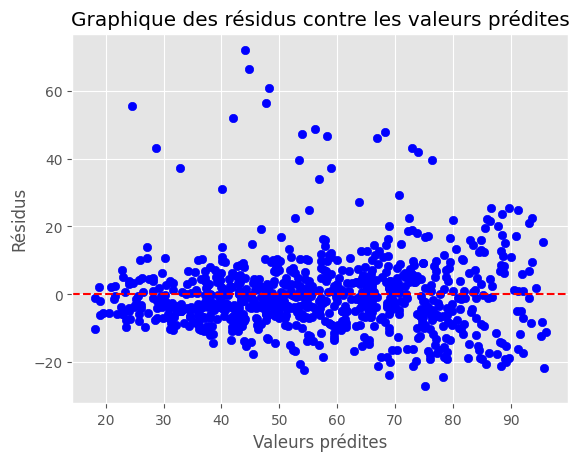

In [177]:
# Tracez les résidus contre les valeurs prédites pour vérifier la linéarité.
y_pred = linear_model.predict(X_train_scaled)
# Calcul des résidus
residuals = y_train - y_pred

plt.scatter(y_pred, residuals, color='blue')  # Spécification de la couleur du nuage points
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.title('Graphique des résidus contre les valeurs prédites')
plt.show()

### 3.2 Vérification de l'autocorrélation : indépendance des erreurs (Durbin-Watson)

In [178]:
from statsmodels.stats.stattools import durbin_watson

# Calcul de la statistique de Durbin-Watson sur les résidus
dw_stat = durbin_watson(residuals)

print(f"Statistique de Durbin-Watson : {dw_stat}")


Statistique de Durbin-Watson : 2.007056711400151


**Conclusion :**
Le modèle satisfait le critère d'absence d'autocorrélation (la statistique ≈ 2), ce qui renforce la fiabilité des estimations des coefficients. Vous pouvez donc interpréter les résultats avec confiance.

### 3.3. Vérification de la normalité : normalité des erreurs

In [179]:
# Test de Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)

# Test d'Anderson-Darling
anderson_test = stats.anderson(residuals, dist='norm')

# Test de Kolmogorov-Smirnov
ks_test = stats.kstest(residuals, 'norm')

# Mettre les résultats dans un dataframe
data_normality = pd.DataFrame({
    'Test de normalité': ['Shapiro-Wilk', 'Anderson-Darling', 'Kolmogorov-Smirnov'],
    'Statistique': [shapiro_test.statistic, anderson_test.statistic, ks_test.statistic],
    'p-value': [shapiro_test.pvalue, 'N/A', ks_test.pvalue]
})

# Afficher le tableau
print(data_normality)

    Test de normalité  Statistique  p-value
0        Shapiro-Wilk     0.870834 0.000000
1    Anderson-Darling    18.441938      N/A
2  Kolmogorov-Smirnov     0.446443 0.000000


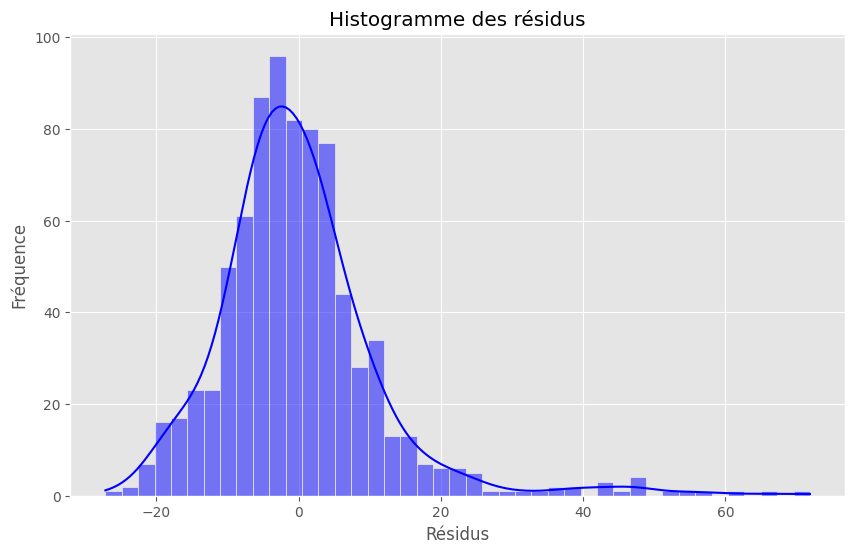

In [180]:
# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="blue")
plt.title('Histogramme des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()


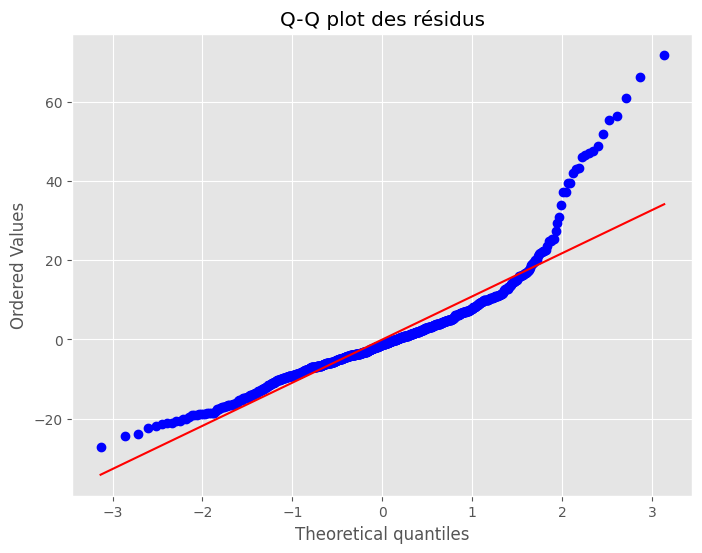

In [181]:
# Q-Q plot pour tester la normalité des résidus
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q plot des résidus')
plt.show()

### Moyenne des termes d'erreur

In [182]:
residuals.mean()

7.105427357601002e-16

**Conclusion :**
Une moyenne des résidus proche de zéro est généralement un bon signe que le modèle n'est pas biaisé. Dans votre Bien que la moyenne des résidus soit légèrement négative, elle n'est pas suffisamment importante pour suggérer un problème majeur de biais dans le modèle.

### Multicolinéarité (Variance Inflation Factor - VIF)

In [183]:
# Calcul du VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X_numeric.columns
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]
# Afficher les résultats
print(vif_data)

                 Variable       VIF
0             Distance_km 13.446636
1    Preparation_Time_min  7.444736
2  Courier_Experience_yrs  2.759401
3       Delivery_Time_min 25.740751


### Validation croisée

In [184]:
from sklearn.model_selection import cross_val_score

# Effectuer la validation croisée (par exemple, 5 folds)
cv_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='r2')

# Afficher les scores R² pour chaque fold
print(f"Scores R² pour chaque fold : {cv_scores}")

# Calculer et afficher la moyenne des scores R²
mean_r2 = np.mean(cv_scores)
print(f"Score R² moyen sur les 5 folds : {mean_r2:.4f}")

Scores R² pour chaque fold : [0.74314059 0.63332572 0.73011083 0.70226273 0.75192538]
Score R² moyen sur les 5 folds : 0.7122


### Homoscédasticité des résidus

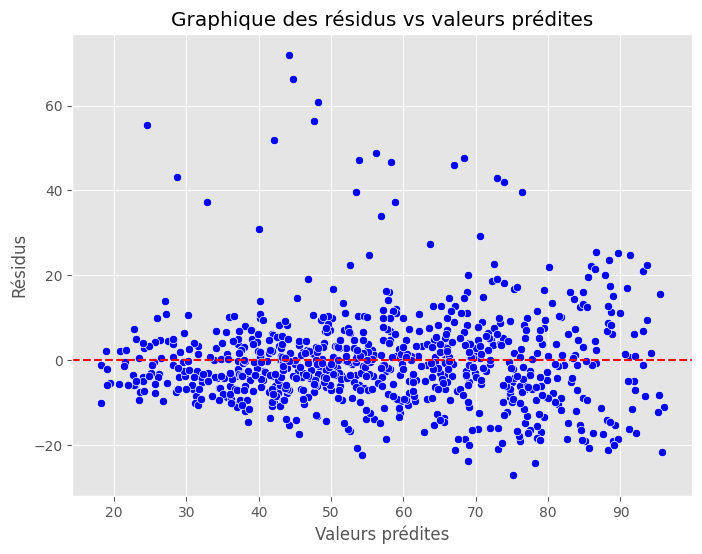

In [185]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prédictions sur l'ensemble d'entraînement
y_pred = linear_model.predict(X_train_scaled)

# Calcul des résidus
residuals = y_train - y_pred

# Graphique des résidus vs. valeurs prédites
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color = 'b')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.title('Graphique des résidus vs valeurs prédites')
plt.show()


### Test de Breusch-Pagan

In [186]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Ajouter une constante à X_train_scaled pour l'inclusion du biais dans le modèle
X_train_scaled_with_const = sm.add_constant(X_train_scaled)

# Effectuer le test de Breusch-Pagan
bp_test = het_breuschpagan(residuals, X_train_scaled_with_const)

# Afficher les résultats
print(f"Statistique de test: {bp_test[0]}")
print(f"p-value: {bp_test[1]}")
print(f"Statistique de Lagrange Multiplier (LM): {bp_test[2]}")
print(f"p-value (LM): {bp_test[3]}")


Statistique de test: 6.265144987687066
p-value: 0.043605478020673404
Statistique de Lagrange Multiplier (LM): 3.145458791216318
p-value (LM): 0.04358205525411591



Les résultats du test de Breusch-Pagan montrent une p-value de 0.0436 (pour la statistique de test) et de 0.0436 également pour la statistique de Lagrange Multiplier (LM).

Puisque la p-value est inférieure à un seuil commun de 0.05, cela suggère que vous avez des preuves suffisantes pour rejeter l'hypothèse nulle d'homoscédasticité. En d'autres termes, les résidus de votre modèle de régression semblent présenter une hétéroscédasticité, ce qui signifie que la variance des erreurs varie selon les valeurs prédites.

Dans ce cas, il pourrait être utile d'envisager des transformations des variables, d'utiliser des modèles robustes aux hétéroscédasticités (comme les erreurs standards robustes), ou d'explorer d'autres techniques pour améliorer la performance de votre modèle.

Si vous souhaitez plus de détails sur les solutions à l'hétéroscédasticité ou d'autres tests possibles, je suis là pour vous aider !

## 4. Respécification  du modèle

### Détection et traitement des valeurs aberrantes et influentes

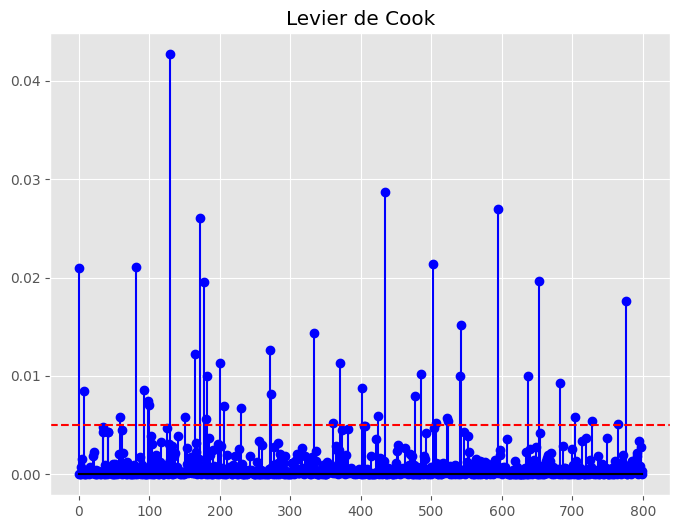

In [187]:
import numpy as np
import statsmodels.api as sm

# Ajouter une constante pour le modèle linéaire
X_train_scaled_const = sm.add_constant(X_train_scaled)

# Ajuster le modèle avec statsmodels pour obtenir les levier de Cook
model_sm = sm.OLS(y_train, X_train_scaled_const).fit()

# Calcul des levier de Cook
influence = model_sm.get_influence()
cooks_distance = influence.cooks_distance[0]

# Identifiez les points influents
threshold = 4 / len(X_train_scaled)
influential_points = cooks_distance > threshold

# Affichage des points influents
plt.figure(figsize=(8, 6))
plt.stem(cooks_distance, 
         linefmt='b-', 
         markerfmt='bo', 
         basefmt='k-')  # tiges et points en bleu
plt.axhline(y=threshold, 
            color='r', 
            linestyle='--')
plt.title('Levier de Cook')
plt.show()

In [188]:
# Affichez les indices des points influents
print("Indices des points influents :", np.where(influential_points)[0])

# Affichez le nombre de points influents
print("Nombre de points influents :", np.sum(influential_points))

Indices des points influents : [  0   8  59  81  93  98 100 129 151 165 172 177 180 182 201 206 230 271
 272 333 360 370 401 424 434 477 486 503 507 522 524 540 542 595 637 653
 682 704 728 764 776]
Nombre de points influents : 41


In [189]:
import pandas as pd

# Créez un DataFrame pour visualiser les points influents
indices_influents = np.where(influential_points)[0]
df_influents = pd.DataFrame({
    'Index des points influents': indices_influents,
    'Valeurs prédites': y_pred[influential_points],
    'Résidus': residuals[influential_points]
})

df_influents


,Index des points influents,Valeurs prédites,Résidus
29,0,73.964187,42.035813
495,8,89.700243,25.299757
5,59,76.085467,-19.085467
797,81,53.853975,47.146025
464,93,95.735931,-21.735931
7,98,67.132623,-21.132623
541,100,70.639955,29.360045
133,129,24.629251,55.370749
274,151,88.983290,-18.983290
28,165,32.800177,37.199823


In [190]:
# Supprimer les indices des points influents
X_train_scaled_filtered = np.delete(X_train_scaled, influential_points, axis=0)
y_train_filtered = np.delete(y_train, influential_points)


In [191]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS
import statsmodels.api as sm

# Ajuster le modèle de régression linéaire sur les données filtrées
linear_model_filtered = LinearRegression()
linear_model_filtered.fit(X_train_scaled_filtered, y_train_filtered)

# Prédictions sur l'ensemble d'entraînement
y_pred_filtered = linear_model_filtered.predict(X_train_scaled_filtered)
residuals_filtered = y_train_filtered - y_pred_filtered

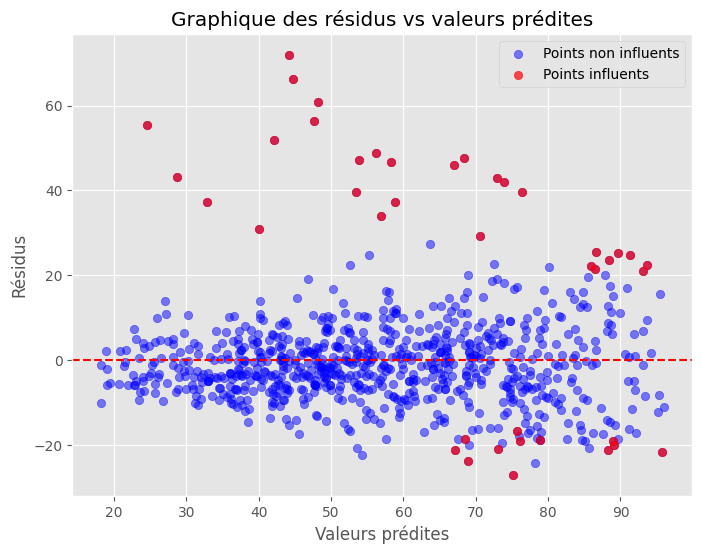

In [192]:
# Graphique des résidus vs valeurs prédites avec les points influents en rouge
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, label='Points non influents', color='blue', alpha=0.5)
plt.scatter(y_pred[influential_points], residuals[influential_points], label='Points influents', color='red', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.title('Graphique des résidus vs valeurs prédites')
plt.legend()
plt.show()

In [193]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calcul des métriques pour le modèle initial (avec points influents)
y_pred_initial = linear_model.predict(X_train_scaled)
rmse_initial = np.sqrt(mean_squared_error(y_train, y_pred_initial))
mae_initial = mean_absolute_error(y_train, y_pred_initial)
mse_initial = mean_squared_error(y_train, y_pred_initial)
r2_initial = linear_model.score(X_train_scaled, y_train)

# Calcul des métriques pour le modèle après retrait des points influents
y_pred_filtered = linear_model_filtered.predict(X_train_scaled_filtered)
rmse_filtered = np.sqrt(mean_squared_error(y_train_filtered, y_pred_filtered))
mae_filtered = mean_absolute_error(y_train_filtered, y_pred_filtered)
mse_filtered = mean_squared_error(y_train_filtered, y_pred_filtered)
r2_filtered = linear_model_filtered.score(X_train_scaled_filtered, y_train_filtered)


# Création du DataFrame pour les métriques
metriq_data = {
    "Modèle": ["Initial (avec points influents)", "Après retrait des points influents"],
    "RMSE": [rmse_initial, rmse_filtered],
    "MAE": [mae_initial, mae_filtered],
    "MSE": [mse_initial, mse_filtered],
    "R²": [r2_initial, r2_filtered]
}

metriq_df = pd.DataFrame(metriq_data)

# Affichage du DataFrame
metriq_df


,Modèle,RMSE,MAE,MSE,R²
0,Initial (avec points influents),11.651616,7.918992,135.760156,0.715340
1,Après retrait des points influents,8.127954,6.368296,66.063631,0.838099


Les résultats montrent une amélioration nette des performances du modèle après le retrait des points influents. Voici l'analyse des résultats :

Modèle initial (avec points influents) :

RMSE (Root Mean Squared Error) : 11.65 – Cela montre l'erreur quadratique moyenne entre les prédictions et les valeurs réelles. Une valeur élevée indique que le modèle fait des erreurs relativement importantes.

MAE (Mean Absolute Error) : 7.92 – Cela indique l'erreur absolue moyenne. Une valeur plus basse est préférable, donc cette erreur est assez importante.

MSE (Mean Squared Error) : 135.76 – L'erreur quadratique moyenne. Cette valeur est également relativement élevée, ce qui correspond à une plus grande dispersion des erreurs.

R² : 0.7153 – Cela signifie que 71.53 % de la variance des données est expliquée par le modèle. C'est un bon début, mais il peut être amélioré.
Modèle après retrait des points influents :

RMSE : 8.13 – Cette amélioration (comparée à 11.65) montre que l'erreur moyenne du modèle a été réduite après la suppression des points influents.

MAE : 6.37 – L'erreur absolue moyenne a également diminué, ce qui indique que le modèle est désormais plus précis.

MSE : 66.06 – Une réduction significative par rapport à 135.76. Cela montre que l'impact des erreurs quadratiques a été réduit après avoir enlevé les points influents.

R² : 0.8381 – Le R² a considérablement augmenté, atteignant 83.81 %. Cela signifie que le modèle explique désormais une plus grande proportion de la variance des données, ce qui est un signe clair d'amélioration.
Conclusion :

En retirant les points influents, nous avons réussi à améliorer considérablement la performance de votre modèle :

Le R² a augmenté de manière significative.
L'RMSE, le MAE, et le MSE ont tous diminué, indiquant une réduction des erreurs.
Cela confirme que ces points influents avaient un impact négatif sur le modèle.
Vous pouvez désormais utiliser ce modèle ajusté pour vos prédictions avec plus de confiance, en sachant que sa performance a été nettement améliorée après avoir pris en compte l'influence des points aberrants.

In [194]:
import numpy as np
import pandas as pd

# Supposons que les noms de colonnes pour les caractéristiques sont 'distance' et 'preparation_time'
col_nam = ['Distance_km', 'Preparation_Time_min']

# Nouvelle donnée : distance de 10 km et temps de préparation de 15 minutes
nouv_donnee = np.array([[10, 15]])

# Créer un DataFrame pour les nouvelles données avec les mêmes colonnes que celles utilisées pour entraîner le modèle
nouv_donnee_df = pd.DataFrame(nouv_donnee, columns=col_nam)

# Mettre à l'échelle les nouvelles données en utilisant le scaler que vous avez utilisé pour entraîner le modèle
nouv_donnee_scaled = scaler.transform(nouv_donnee_df)

# Faire la prédiction avec le modèle linéaire
prediction = linear_model_filtered.predict(nouv_donnee_scaled)

# Afficher la prédiction
print("Temps de livraison prédit (en minutes):", prediction[0])


Temps de livraison prédit (en minutes): 53.38045677698895


# PARTIE III : ANOVA

## 1. Graphe des délais de livraison selon la météo

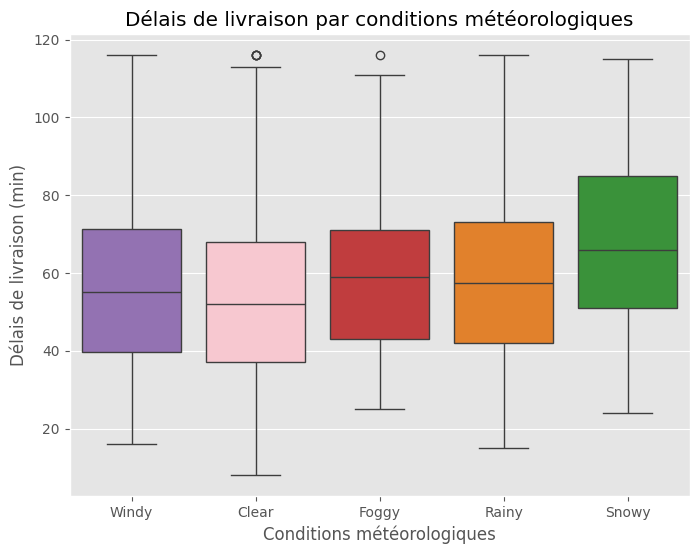

In [195]:
# Palette personnalisée pour le boxplot
palette = {
    'Sunny': '#1f77b4',   # Bleu
    'Rainy': '#ff7f0e',  # Orange
    'Snowy': '#2ca02c',   # Vert
    'Foggy': '#d62728',   # Rouge
    'Windy': '#9467bd',    # Violet
    'Clear':  'pink'    # Rose
}
plt.figure(figsize=(8, 6))
sns.boxplot(x='Weather', 
            y='Delivery_Time_min', 
            hue='Weather', 
            data=df, palette=palette,
            dodge=False)
plt.title('Délais de livraison par conditions météorologiques')
plt.xlabel('Conditions météorologiques')
plt.ylabel('Délais de livraison (min)')
plt.show()


## 2. Vérification des hypothèses

### 2.1. Normalité des résidus

In [196]:
weather_groups = [group['Delivery_Time_min'].values for name, group in df.groupby('Weather')]
stat, p_normal = stats.shapiro(df['Delivery_Time_min'])
print(f"Test de normalité (Shapiro-Wilk) : Stat={stat:.4f}, p-value={p_normal:.4f}")

Test de normalité (Shapiro-Wilk) : Stat=0.9847, p-value=0.0000


1. **Statistique** : 0.9847

2. **p-valeur** : 0.0000 (inférieure à 0.05)


   **Conclusion** :
La p-valeur indique que la distribution des résidus ne suit pas une loi normale.

   Cela viole l'une des hypothèses de base de l'ANOVA (normalité des résidus).

### 2.2. Homogénéité des variances

In [197]:
stat, p_var = stats.levene(*weather_groups)
print(f"Test d'homogénéité des variances (Levene) : Stat={stat:.4f}, p-value={p_var:.4f}")

Test d'homogénéité des variances (Levene) : Stat=0.4392, p-value=0.7803


1. **Statistique** : 0.4392

2. **p-valeur** : 0.7803 (supérieure à 0.05)

   **Conclusion** :
La p-valeur indique que les variances des délais de livraison entre les groupes de conditions météorologiques sont homogènes. 
   L'hypothèse d'homogénéité des variances (homoscédasticité) est satisfaite.

## 3. Modèle ANOVA

In [198]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ajuster le modèle avec OLS
model = ols('Delivery_Time_min ~ C(Weather)', data=df).fit()

# Calculer la table ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nTable ANOVA :")
print(anova_table)

# Interprétation
if anova_table['PR(>F)'].iloc[0] < 0.05:
    print("\nConclusion : Les délais de livraison diffèrent significativement entre les conditions météorologiques.")
else:
    print("\nConclusion : Aucune différence significative dans les délais de livraison entre les conditions météorologiques.")



Table ANOVA :
                  sum_sq         df         F   PR(>F)
C(Weather)  20006.909747   4.000000 11.040332 0.000000
Residual   450776.206253 995.000000       NaN      NaN

Conclusion : Les délais de livraison diffèrent significativement entre les conditions météorologiques.


**p-valeur de 9.171176e-09** : Cette valeur est très faible, ce qui suggère une différence significative entre les groupes de conditions météorologiques.
Cependant, la violation de l'hypothèse de normalité peut rendre les résultats de l'ANOVA moins fiables.

In [199]:
from scipy.stats import kruskal

# Test de Kruskal-Wallis
stat, p_value = kruskal(*[df['Delivery_Time_min'][df['Weather'] == condition] for condition in df['Weather'].unique()])

print(f"Statistique de Kruskal-Wallis: {stat:.4f}, p-valeur: {p_value:.4f}")

# Conclusion basée sur la p-valeur
if p_value < 0.05:
    print("Les délais de livraison diffèrent significativement entre les conditions météorologiques (test de Kruskal-Wallis).")
else:
    print("Aucune différence significative dans les délais de livraison entre les conditions météorologiques (test de Kruskal-Wallis).")


Statistique de Kruskal-Wallis: 37.0479, p-valeur: 0.0000
Les délais de livraison diffèrent significativement entre les conditions météorologiques (test de Kruskal-Wallis).


1. **Statistique** :  37.0479

2. **p-valeur** : 0.0000 (inférieure à 0.05)

   **Conclusion** :
La p-valeur très faible indique que les délais de livraison ne sont pas distribués de manière identique entre les groupes de conditions météorologiques. 

   Cela valide l'hypothèse selon laquelle la météo influence les délais de livraison.